In [1]:
# %load_ext autotime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [2]:
np.random.seed(32)

## user

In [3]:
user_column_names = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
user_df = pd.read_csv("ml-100k/u.user", sep='|', names=user_column_names)

print(user_df.shape)
user_df[:10]

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [4]:
# user_df['area'] = [str(user_df.iloc[i, 4])[:3] for i in range(len(user_df))]
user_df.drop(columns="zip_code", inplace=True)
user_df[:5]


,user_id,age,sex,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [5]:
user_df.nunique()

user_id       943
age            61
sex             2
occupation     21
dtype: int64

In [6]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   occupation  943 non-null    object
dtypes: int64(2), object(2)
memory usage: 29.6+ KB


## item

In [127]:
item_column_names = ['movie_id', 'movie title' ,'release_date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

item_df = pd.read_csv('ml-100k/u.item', sep='|', names=item_column_names, encoding='latin-1')
item_df[:3]

,movie_id,movie title,release_date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [128]:
## ---------------------------------------------------------------- make year column
item_df['year'] = [str(item_df['release_date'][i])[-4:] for i in range(len(item_df))]
item_df[:3]

,movie_id,movie title,release_date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


In [131]:
# item_df.drop(columns=['movie title', 'release_date', 'video release date', 'IMDb URL'], inplace=True)

# item_df.drop(columns=['release_date', 'video release date', 'IMDb URL'], inplace=True)
# item_df['name'] = [str(item_df['movie title'][i])[:-7] for i in range(len(item_df))]

print(item_df.shape)
item_df[:3]

(1682, 22)


,movie_id,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


In [10]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     1682 non-null   int64 
 1   unknown      1682 non-null   int64 
 2   Action       1682 non-null   int64 
 3   Adventure    1682 non-null   int64 
 4   Animation    1682 non-null   int64 
 5   Children's   1682 non-null   int64 
 6   Comedy       1682 non-null   int64 
 7   Crime        1682 non-null   int64 
 8   Documentary  1682 non-null   int64 
 9   Drama        1682 non-null   int64 
 10  Fantasy      1682 non-null   int64 
 11  Film-Noir    1682 non-null   int64 
 12  Horror       1682 non-null   int64 
 13  Musical      1682 non-null   int64 
 14  Mystery      1682 non-null   int64 
 15  Romance      1682 non-null   int64 
 16  Sci-Fi       1682 non-null   int64 
 17  Thriller     1682 non-null   int64 
 18  War          1682 non-null   int64 
 19  Western      1682 non-null 

In [11]:
item_df_unkown = item_df[item_df['unknown'] == 1]
item_df_unkown

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
266,267,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nan
1372,1373,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1971


In [12]:
item_df_drop = item_df_unkown.movie_id
item_df_dropped = item_df_drop.to_numpy()
item_df_dropped

array([ 267, 1373])

In [13]:
dropIdx = item_df_unkown.index
item_df.drop(dropIdx, inplace=True)
item_df.drop(columns=['unknown'], inplace=True)

In [14]:
item_df['year'] = pd.to_numeric(item_df['year'])
item_df[:5]

,movie_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
3,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995


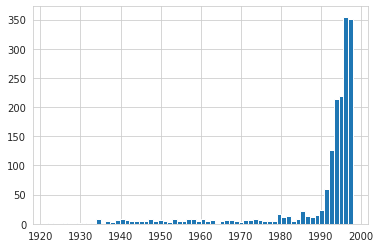

In [15]:
plt.hist(item_df['year'], bins=64)
plt.show()

In [16]:
# item_df['year'].value_counts()

In [17]:
for column in ["year"]:
    MIN = item_df[column].min()
    MAX = item_df[column].max()
    print(f"MIN={MIN}, MAX={MAX}")
    item_df[column] = (item_df[column] - MIN) / (MAX - MIN)


MIN=1922, MAX=1998


In [18]:
print(item_df.shape)
item_df[:8]

(1680, 20)


,movie_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.960526
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.960526
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.960526
3,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.960526
4,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0.960526
5,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.960526
6,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.960526
7,8,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.960526


In [19]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1681
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     1680 non-null   int64  
 1   Action       1680 non-null   int64  
 2   Adventure    1680 non-null   int64  
 3   Animation    1680 non-null   int64  
 4   Children's   1680 non-null   int64  
 5   Comedy       1680 non-null   int64  
 6   Crime        1680 non-null   int64  
 7   Documentary  1680 non-null   int64  
 8   Drama        1680 non-null   int64  
 9   Fantasy      1680 non-null   int64  
 10  Film-Noir    1680 non-null   int64  
 11  Horror       1680 non-null   int64  
 12  Musical      1680 non-null   int64  
 13  Mystery      1680 non-null   int64  
 14  Romance      1680 non-null   int64  
 15  Sci-Fi       1680 non-null   int64  
 16  Thriller     1680 non-null   int64  
 17  War          1680 non-null   int64  
 18  Western      1680 non-null   int64  
 19  year  

## rating

In [20]:
rating_column_names = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

rating_train_df = pd.read_csv('ml-100k/ua.base', sep='\t', names=rating_column_names, encoding='latin-1')
rating_test_df = pd.read_csv('ml-100k/ua.test', sep='\t', names=rating_column_names, encoding='latin-1')

print(rating_train_df.shape)

rating_train_df.drop(columns="unix_timestamp", inplace=True)
rating_train_df[:8]


(90570, 4)


,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
5,1,6,5
6,1,7,4
7,1,8,1


In [21]:
print(rating_test_df.shape)

rating_test_df.drop(columns="unix_timestamp", inplace=True)
rating_test_df[:8]

(9430, 4)


,user_id,movie_id,rating
0,1,20,4
1,1,33,4
2,1,61,4
3,1,117,3
4,1,155,2
5,1,160,4
6,1,171,5
7,1,189,3


In [22]:
for i in range(len(item_df_dropped)):
    rating_base_unkown = rating_train_df[rating_train_df['movie_id'] == item_df_dropped[i]]
    rating_train_df.drop(rating_base_unkown.index, inplace=True)

    rating_test_unkown = rating_test_df[rating_test_df['movie_id'] == item_df_dropped[i]]
    rating_test_df.drop(rating_test_unkown.index, inplace=True)

print(rating_train_df.shape)
print(rating_test_df.shape)

(90561, 3)
(9429, 3)


In [23]:
# rating_train_df = rating_train_df.append(rating_test_df)
# rating_train_df.head()

rating


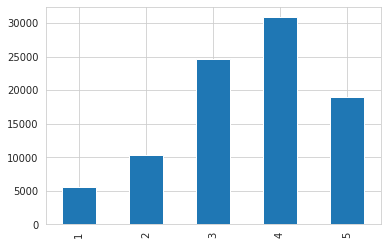

In [24]:
for column in ["rating"]:
    print(column)
    rating_train_df[column].value_counts().sort_index().plot(kind='bar')
    plt.show()

In [25]:
SCORE_DIFF = rating_train_df["rating"].max() - rating_train_df["rating"].min()
SCORE_MIN = rating_train_df["rating"].min()
print(f"SCORE_DIFF = {SCORE_DIFF}")
print(f"SCORE_MIN = {SCORE_MIN}")

SCORE_DIFF = 4
SCORE_MIN = 1


# FINAL DATASET

In [26]:
'''
age: normalize
sex: binary
occupation: one-hot
year: normalize
'''

'''
user_id: embedding
movie_id: embedding
rating: abs(user_id embedding - movie_id embedding)
'''


'\nage: normalize\nsex: binary\noccupation: one-hot\nyear: normalize\n'

In [27]:
## ---------------------------------------------------------------- rating normalize
target_df = rating_train_df['rating']
rating_train_df['rating'] = (target_df - target_df.min()) / (target_df.max() - target_df.min())

target_df = rating_test_df['rating']
rating_test_df['rating'] = (target_df - target_df.min()) / (target_df.max() - target_df.min())

rating_train_df[:5]

,user_id,movie_id,rating
0,1,1,1.00
1,1,2,0.50
2,1,3,0.75
3,1,4,0.50
4,1,5,0.50


In [28]:
## ---------------------------------------------------------------- age normalize
target_df = user_df['age']
age_mn, age_mx = 4, 88
user_df['age'] = (target_df - age_mn) / (age_mx - age_mn)
user_df[:4]

,user_id,age,sex,occupation
0,1,0.238095,M,technician
1,2,0.583333,F,other
2,3,0.226190,M,writer
3,4,0.238095,M,technician


In [29]:
## ---------------------------------------------------------------- sex binarize
user_df.loc[user_df['sex'] == 'M', 'sex'] = 1
user_df.loc[user_df['sex'] == 'F', 'sex'] = 0
user_df[:4]

,user_id,age,sex,occupation
0,1,0.238095,1,technician
1,2,0.583333,0,other
2,3,0.226190,1,writer
3,4,0.238095,1,technician


In [31]:
occupation_len = len(user_df['occupation'].unique())
# layer.Embedding(occupation_len, 1)

21

In [36]:
test_arr = user_df['occupation'].unique()
test_arr.shape

(21,)

In [30]:
item_df[:4]

,movie_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.960526
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.960526
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.960526
3,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.960526


In [106]:
X1 = rating_train_df.iloc[:, :2].to_numpy()
Y1 = rating_train_df.iloc[:, 2:].to_numpy()

X11 = rating_test_df.iloc[:, :2].to_numpy()
Y11 = rating_test_df.iloc[:, 2:].to_numpy()

In [107]:
num = 2
# X1[:num]
# X11[:num]
Y1[:num]
# Y11[:num]

array([[1. ],
       [0.5]])

In [104]:
from keras.layers import Dense, Dropout
from keras import Input, losses, Model, optimizers
from keras.metrics import MeanSquaredError, RootMeanSquaredError
import tensorflow as tf


def make_inc():
    val = [0]
    def inc():
        val[0] += 1
        return val[0]
    return inc

inc = make_inc()

f0, f1, f2, f3, f4, f5, f6, f7, f8 = 4, 8, 12, 16, 20, 24, 28, 32, 36
a0, a1 = "swish", "relu"


def layer(x):
    # x = Conv1D(f0, 3, activation='swish', input_shape=x.shape[1])(x)
    # x = Conv1D(f1, 3, activation='swish')(x)
    # x = Conv1D(f2, 3, activation='swish')(x)
    # x = Conv1D(f3, 3, activation='swish')(x)
    # x = Conv1D(f4, 3, activation='swish')(x)
    # x = Conv1D(f5, 3, activation='swish')(x)
    # x = Conv1D(f6, 3, activation='swish')(x)
    # x = Conv1D(f7, 3, activation='swish')(x)
    # x = Conv1D(f8, x.shaoe[0], activation='swish')(x)
    x = Dense(f0, activation=a0)(x)
    x = Dense(f1, activation=a0)(x)
    x = Dense(f2, activation=a0)(x)
    x = Dense(f3, activation=a0)(x)
    x = Dense(f4, activation=a0)(x)
    x = Dense(f3, activation=a0)(x)
    x = Dense(f2, activation=a0)(x)
    x = Dense(f1, activation=a0)(x)
    x = Dense(f0, activation=a0)(x)

    return x


input = Input(2)
x = layer(input)
# x = Dropout(.5)(x)
output = Dense(1, activation=a0)(x)

model = Model(input, output)
# return model

## -------------------------------------------------------------------------------- COMPILE
## ---------------------------------------------------------------- OPTIMIZER
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001,
                                                             decay_steps=100000,
                                                             decay_rate=0.96,
                                                             staircase=True)
# lr_schedule = k.optimizers.schedules.CosineDecay(initial_learning_rate=1e-4,
#                                                  decay_steps=EPOCH,)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

# optimizer = optimizers.Adam(learning_rate=0.0001)

## ---------------------------------------------------------------- LOSS
# def adaptive_loss():
#     pass
# loss = losses.MeanAbsoluteError()
# loss = losses.BinaryCrossentropy()
loss = losses.MeanSquaredError()
# loss = losses.SparseCategoricalCrossentropy()
# loss = losses.BinaryFocalCrossentropy(  #apply_class_balancing=False,
# alpha=0.25,
# gamma=2.0,
# from_logits=False,
# label_smoothing=0.0,
# axis=-1,
# reduction=losses_utils.ReductionV2.AUTO,
# name='binary_focal_crossentropy'
# )

## ---------------------------------------------------------------- METRICS
# metrics = round(MeanSquaredError()**0.5, 4)
# metrics = [RootMeanSquaredError()]
# metrics = [SparseCategoricalAccuracy]
metrics = ['accuracy']

## ---------------------------------------------------------------- COMPILE
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.summary()


Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_110 (Dense)           (None, 4)                 12        
                                                                 
 dense_111 (Dense)           (None, 8)                 40        
                                                                 
 dense_112 (Dense)           (None, 12)                108       
                                                                 
 dense_113 (Dense)           (None, 16)                208       
                                                                 
 dense_114 (Dense)           (None, 20)                340       
                                                                 
 dense_115 (Dense)           (None, 16)                336

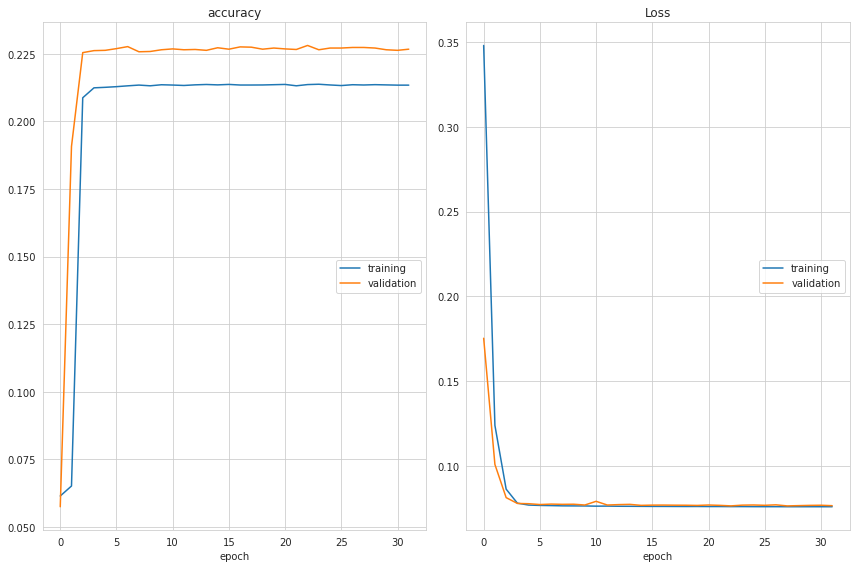

accuracy
	training         	 (min:    0.061, max:    0.214, cur:    0.213)
	validation       	 (min:    0.057, max:    0.228, cur:    0.227)
Loss
	training         	 (min:    0.076, max:    0.348, cur:    0.076)
	validation       	 (min:    0.076, max:    0.175, cur:    0.077)
1416/1416 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.2134 - val_loss: 0.0765 - val_accuracy: 0.2267


In [105]:
from livelossplot import PlotLossesKeras
from datetime import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard


TIME = f"{datetime.now().strftime('%Y%m%d-%H%M%S')}"
MODEL_VERSION = f"0.1"
SAVE_PATH = f"OUT/{MODEL_VERSION}"
MODEL_NAME = f"recommend"

## ---------------------------------------------------------------- INIT
EPOCH = 32
BATCH = 64
# ES = 4
ES = EPOCH//2

## ---------------------------------------------------------------- CALLBACK
earlyStop = EarlyStopping(patience=ES, monitor='val_loss', mode='auto', verbose=1)
tensorBoard = TensorBoard(log_dir=f"{SAVE_PATH}/log/{TIME}", histogram_freq=1)
checkPoint = ModelCheckpoint(f"{SAVE_PATH}/model/{TIME}_{MODEL_NAME}_ckpt.h5",  ## _{epoch:02d}-{val_loss:.2f},
                             save_best_only=True, verbose=1, save_freq='epoch',
                             monitor='val_accuracy',  ## 'loss', 'val_accuracy', 'val_loss'
                             mode='max')
history = model.fit(X1, Y1,
                    # validation_split=0.1,
                    validation_data=(X11, Y11),
                    batch_size=BATCH,
                    epochs=EPOCH,
                    use_multiprocessing=True,
                    verbose=1,
                    callbacks=[earlyStop,
                               tensorBoard,
                               checkPoint,
                               PlotLossesKeras(),
                               # PlotLossesKerasTF(),
                               ],
                    )

In [ ]:
train_df = user_df.merge(rating_train_df, left_on='user_id', right_on='user_id')
print(f"train_df.shape: {train_df.shape}")
# train_df[:8]

test_df = user_df.merge(rating_test_df, left_on='user_id', right_on='user_id')
print(f"test_df.shape: {test_df.shape}")
test_df[:8]

In [409]:
user_np = user_df.to_numpy()
print(user_np.shape)
print(user_np[:2])

(943, 5)
[[1 24 'M' 'technician' '857']
 [2 53 'F' 'other' '940']]


In [410]:
content_np = item_df.to_numpy()
print(content_np.shape)
print(content_np[:2])

(1680, 20)
[[1.         0.         0.         1.         1.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.96052632]
 [2.         1.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.96052632]]


In [419]:
rating_np = rating_train_df.to_numpy()
print(rating_np.shape)
print(rating_np[300:300+10])

(90561, 3)
[[  2.   302.     1.  ]
 [  2.   303.     0.75]
 [  2.   304.     0.75]
 [  2.   305.     0.5 ]
 [  2.   306.     0.75]
 [  2.   307.     0.5 ]
 [  2.   308.     0.5 ]
 [  2.   309.     0.  ]
 [  2.   310.     0.75]
 [  2.   311.     1.  ]]


In [427]:
rating_np1 = rating_test_df.to_numpy()
print(rating_np1.shape)
print(rating_np1[:10+10])

(9429, 3)
[[1.00e+00 2.00e+01 7.50e-01]
 [1.00e+00 3.30e+01 7.50e-01]
 [1.00e+00 6.10e+01 7.50e-01]
 [1.00e+00 1.17e+02 5.00e-01]
 [1.00e+00 1.55e+02 2.50e-01]
 [1.00e+00 1.60e+02 7.50e-01]
 [1.00e+00 1.71e+02 1.00e+00]
 [1.00e+00 1.89e+02 5.00e-01]
 [1.00e+00 2.02e+02 1.00e+00]
 [1.00e+00 2.65e+02 7.50e-01]
 [2.00e+00 1.30e+01 7.50e-01]
 [2.00e+00 5.00e+01 1.00e+00]
 [2.00e+00 2.51e+02 1.00e+00]
 [2.00e+00 2.80e+02 5.00e-01]
 [2.00e+00 2.81e+02 5.00e-01]
 [2.00e+00 2.90e+02 5.00e-01]
 [2.00e+00 2.92e+02 7.50e-01]
 [2.00e+00 2.97e+02 7.50e-01]
 [2.00e+00 3.12e+02 5.00e-01]
 [2.00e+00 3.14e+02 0.00e+00]]


In [448]:
rating_np1[0,2].dtype

dtype('float64')

# 상수 정의

In [43]:
LATENT_SIZE = 2
BATCH_SIZE = 256

# User, Content, Score 클래스 정의

In [44]:
import copy

In [45]:
class User:
    def __init__(self, id, features):
        self.id = id
        self.features = features
        self.latent = np.random.random(LATENT_SIZE)

    def __str__(self):
        return f"id:{self.id}, features:{self.features}"

    def copy(self):
        return copy.deepcopy(self)  

    def is_same(self, other):
        return self.id == other.id

In [46]:
class Content:
    def __init__(self, id, features):
        self.id = id
        self.features = features
        self.latent = np.random.random(LATENT_SIZE)

    def __str__(self):
        return f"id:{self.id}, features:{self.features}"

    def copy(self):
        return copy.deepcopy(self)  

    def is_same(self, other):
        return self.id == other.id

In [47]:
class Score:
    def __init__(self, user, content, values):
        self.user = user
        self.content = content
        self.values = values

    def __str__(self):
        return f"user:{self.user.id}, content:{self.content.id}, values:{self.values}"

    def value(self):
        return self.values

    def copy(self):
        return copy.deepcopy(self)  

In [48]:
id_2_user = {}
for i in range(len(user_np)):
    row = user_np[i]
    id = int(row[0])
    features = row[1:]
    user = User(id, features)
    id_2_user[id] = user

In [49]:
id_2_content = {}
for i in range(len(content_np)):
    row = content_np[i]
    id = int(row[0])
    features = row[1:]
    content = Content(id, features)
    id_2_content[id] = content

In [50]:
class Log:
    def __init__(self, raw_values):
        self.user_id = raw_values[0]
        self.content_id = raw_values[1]
        self.scores = raw_values[2:]

    def __str__(self):
        return f"user_id:{self.user_id}, content_id:{self.content_id}, scores:{self.scores}"

# User, Content, Score 객체 만들기

In [51]:
scores = []
for i in range(len(rating_np)):
    log = Log(rating_np[i])
    user = id_2_user[log.user_id]
    content = id_2_content[log.content_id]
    score = Score(user.copy(), content.copy(), log.scores.copy())
    if(i<10): print(score)
    scores.append(score)

user:1, content:1, values:[1.]
user:1, content:2, values:[0.5]
user:1, content:3, values:[0.75]
user:1, content:4, values:[0.5]
user:1, content:5, values:[0.5]
user:1, content:6, values:[1.]
user:1, content:7, values:[0.75]
user:1, content:8, values:[0.]
user:1, content:9, values:[1.]
user:1, content:10, values:[0.5]


In [52]:
print(f"user : {len(id_2_user)}")
print(f"content : {len(id_2_content)}")
print(f"scores : {len(scores)}")

user : 943
content : 1682
scores : 100000


# feature size

In [53]:
SCORE_SIZE = len(scores[0].values)
USER_FEATURE_SIZE = len(scores[0].user.features)
CONTENT_FEATURE_SIZE = len(scores[0].content.features)
print(f"SCORE_SIZE : {SCORE_SIZE}")
print(f"USER_FEATURE_SIZE : {USER_FEATURE_SIZE}")
print(f"CONTENT_FEATURE_SIZE : {CONTENT_FEATURE_SIZE}")


SCORE_SIZE : 1
USER_FEATURE_SIZE : 29
CONTENT_FEATURE_SIZE : 20


# train, test 데이터 나누기

우선 섞고

In [54]:
print(scores[:3])
np.random.shuffle(scores)
print(scores[:3])

[<__main__.Score object at 0x7f601c36ed90>, <__main__.Score object at 0x7f601c36ee50>, <__main__.Score object at 0x7f601c36ee20>]
[<__main__.Score object at 0x7f601a59b340>, <__main__.Score object at 0x7f6018155e80>, <__main__.Score object at 0x7f60199ccb20>]


In [55]:
split_index = int(len(scores)*0.9)
train_scores, test_scores = scores[:split_index], scores[split_index:]

# 학습 데이터에 잡음 추가

In [56]:
NOISE_RATIO = 0.0
for score in train_scores:
    if NOISE_RATIO==0.0: continue
    score.values += np.random.randn(SCORE_SIZE)*NOISE_RATIO
    score.values = score.values.clip(0.0, 1.0)


# 모델 정의

In [57]:
from tensorflow.keras.layers import Input, Dense, concatenate, Dropout, GaussianNoise
from tensorflow.keras.layers import Conv1D, Reshape, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
import tensorflow


f0, f1, f2, f3, f4, f5, f6, f7, f8 = 4, 8, 12, 16, 20, 24, 28, 32, 36
a0, a1 = "swish", "relu"


def layer(x):
    # x = Conv1D(f0, 3, activation='swish', input_shape=x.shape[1])(x)
    # x = Conv1D(f1, 3, activation='swish')(x)
    # x = Conv1D(f2, 3, activation='swish')(x)
    # x = Conv1D(f3, 3, activation='swish')(x)
    # x = Conv1D(f4, 3, activation='swish')(x)
    # x = Conv1D(f5, 3, activation='swish')(x)
    # x = Conv1D(f6, 3, activation='swish')(x)
    # x = Conv1D(f7, 3, activation='swish')(x)
    # x = Conv1D(f8, x.shaoe[0], activation='swish')(x)
    # x = Dense(f8, activation="swish")(x)
    # x = Dense(f7, activation="swish")(x)
    # x = Dense(f6, activation="swish")(x)
    # x = Dense(f5, activation="swish")(x)
    # x = Dense(f4, activation="swish")(x)
    x = Dense(f3, activation=a0)(x)
    x = Dense(f2, activation=a0)(x)
    x = Dense(f1, activation=a0)(x)

    return x


def build_encoder(name):
    latent_input = Input((LATENT_SIZE,))
    user_feature_input = Input((USER_FEATURE_SIZE,))
    content_feature_input = Input((CONTENT_FEATURE_SIZE,))
    score_input = Input((SCORE_SIZE,))
    #   score_input = GaussianNoise(0.3)(score_input)

    latent_x = Dense(6, activation=a0)(latent_input)
    user_feature_x = Dense(int(USER_FEATURE_SIZE/2), activation=a0)(user_feature_input)
    content_feature_x = Dense(int(CONTENT_FEATURE_SIZE/2), activation=a0)(content_feature_input)
    score_x = Dense(6, activation=a0)(score_input)

    x = concatenate([latent_x, user_feature_x, content_feature_x, score_x])
    print(x.shape)
    x = layer(x)
    latent = Dense(LATENT_SIZE, activation="sigmoid")(x)

    return Model((latent_input, user_feature_input, content_feature_input, score_input), latent, name=name)


def build_decoder(name):
    user_latent_input = Input((LATENT_SIZE,))
    user_feature_input = Input((USER_FEATURE_SIZE,))
    content_feature_input = Input((CONTENT_FEATURE_SIZE,))
    content_latent_input = Input((LATENT_SIZE,))

    user_latent_x = Dense(6, activation=a0)(user_latent_input)
    user_feature_x = Dense(int(USER_FEATURE_SIZE/2), activation=a0)(user_feature_input)
    content_feature_x = Dense(int(CONTENT_FEATURE_SIZE/2), activation=a0)(content_feature_input)
    content_lattent_x = Dense(6, activation=a0)(content_latent_input)

    x = concatenate([user_latent_x, user_feature_x, content_feature_x, content_lattent_x])
    x = layer(x)
    score_output = Dense(SCORE_SIZE, activation="sigmoid")(x)

    return Model((user_latent_input, user_feature_input, content_feature_input, content_latent_input), score_output, name=name)


decoder = build_decoder("D")


def build_user_input_autoencoder(name="UIAE"):
    encoder = build_encoder(f"{name}.E")

    user_latent = Input((LATENT_SIZE,))
    user_feature_input = Input((USER_FEATURE_SIZE,))
    content_feature_input = Input((CONTENT_FEATURE_SIZE,))
    score_input = Input((SCORE_SIZE,))

    content_latent = encoder((user_latent, user_feature_input, content_feature_input, score_input))
    score_output = decoder((user_latent, user_feature_input, content_feature_input, content_latent))
    autoencoder = Model((user_latent, user_feature_input, content_feature_input, score_input),
                        (content_latent, score_output), name=name)
    autoencoder.encoder = encoder
    autoencoder.decoder = decoder

    return autoencoder


def build_content_input_autoencoder(name="CIAE"):
    encoder = build_encoder(f"{name}.E")

    content_latent = Input((LATENT_SIZE,))
    user_feature_input = Input((USER_FEATURE_SIZE,))
    content_feature_input = Input((CONTENT_FEATURE_SIZE,))
    score_input = Input((SCORE_SIZE,))

    user_latent = encoder((content_latent, user_feature_input, content_feature_input, score_input))
    score_output = decoder((user_latent, user_feature_input, content_feature_input, content_latent))

    autoencoder = Model((content_latent, user_feature_input, content_feature_input, score_input),
                        (user_latent, score_output), name=name)
    autoencoder.encoder = encoder
    autoencoder.decoder = decoder

    return autoencoder


user_input_autoencoder = build_user_input_autoencoder("UIAE")

2022-11-24 10:45:12.173113: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 10:45:12.292255: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-24 10:45:12.921239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-24 10:45:12.921291: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

(None, 36)


In [58]:
from keras.optimizers.schedules.learning_rate_schedule import ExponentialDecay
from tensorflow.keras.optimizers import Adam, RMSprop


user_input_autoencoder = build_user_input_autoencoder("UIAE")
content_input_autoencoder = build_content_input_autoencoder("CIAE")

lr_schedule = ExponentialDecay(initial_learning_rate=0.0001,
                               decay_steps=100000,
                               decay_rate=0.96,
                               staircase=True)

autoencoder_optimizer = RMSprop(learning_rate=lr_schedule)
encoder_optimizer = RMSprop(learning_rate=lr_schedule)
decoder_optimizer = RMSprop(learning_rate=lr_schedule)

user_input_autoencoder.compile(loss="mse", optimizer=autoencoder_optimizer)
user_input_autoencoder.encoder.compile(loss="mse", optimizer=encoder_optimizer)
user_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)

content_input_autoencoder.compile(loss="mse", optimizer=autoencoder_optimizer)
content_input_autoencoder.encoder.compile(loss="mse", optimizer=encoder_optimizer)
content_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)


(None, 36)
(None, 36)


In [524]:
from neuralplot import ModelPlot

target = content_input_autoencoder.encoder
%matplotlib notebook
modelplot = ModelPlot(target, grid=False, connection=True, linewidth=0.1)
modelplot.show()

NameError: name 'content_input_autoencoder' is not defined

In [59]:
user_input_autoencoder.summary()
user_input_autoencoder.encoder.summary()
user_input_autoencoder.decoder.summary()

Model: "UIAE"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 2)]          0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, 29)]         0           []                               
                                                                                                  
 input_19 (InputLayer)          [(None, 20)]         0           []                               
                                                                                                  
 input_20 (InputLayer)          [(None, 1)]          0           []                               
                                                                                               

# 학습을 위한 데이터 생성 함수들 정의

In [61]:
def build_user_input_autoencoder_data(scores):
    input_latents = np.array([score.user.latent for score in scores])
    user_features = np.array([score.user.features for score in scores])
    content_features = np.array([score.content.features for score in scores])
    input_scores = np.array([score.value() for score in scores])
    return input_latents, user_features, content_features, input_scores

def build_content_input_autoencoder_data(scores):
    input_latents = np.array([score.content.latent for score in scores])
    user_features = np.array([score.user.features for score in scores])
    content_features = np.array([score.content.features for score in scores])
    input_scores = np.array([score.value() for score in scores])
    return input_latents, user_features, content_features, input_scores


# train 데이터에는 없는 test 데이터 삭제

In [62]:
content_id_2_scores = {}
user_id_2_scores = {}

for score in train_scores:
    content_id_2_scores[score.content.id] = []
    user_id_2_scores[score.user.id] = []

for score in train_scores:
    content_id_2_scores[score.content.id].append(score)
    user_id_2_scores[score.user.id].append(score)

content_ids = content_id_2_scores.keys()
user_ids = user_id_2_scores.keys()

to_be_removed_scores = set()
for score in test_scores:
    if score.content.id not in content_id_2_scores.keys():
        to_be_removed_scores.add(score)
    if score.user.id not in user_id_2_scores.keys():
        to_be_removed_scores.add(score)

print(f"{len(to_be_removed_scores)} scores removed in test_scores.")
for score in to_be_removed_scores:
    test_scores.remove(score)

12 scores removed in test_scores.


# 사용자의 rating 수 파악

In [63]:
user_id_2_scores = {}
for score in train_scores:
    user_id_2_scores[score.user.id] = []

for score in train_scores:
    user_id_2_scores[score.user.id].append(score)

l = [len(l) for l in user_id_2_scores.values()]
print(l)

[228, 262, 188, 134, 262, 87, 63, 189, 116, 329, 33, 39, 265, 353, 434, 244, 335, 367, 153, 314, 445, 289, 235, 210, 336, 119, 219, 287, 206, 652, 127, 25, 81, 165, 153, 97, 210, 280, 118, 186, 96, 96, 153, 48, 108, 27, 65, 85, 443, 143, 315, 25, 18, 73, 166, 253, 118, 395, 348, 175, 240, 216, 108, 370, 196, 270, 157, 107, 97, 324, 81, 198, 29, 25, 125, 20, 233, 32, 51, 135, 167, 129, 206, 85, 596, 206, 47, 123, 191, 236, 116, 189, 130, 29, 49, 65, 355, 107, 213, 156, 48, 205, 179, 100, 82, 50, 130, 115, 219, 51, 211, 464, 125, 274, 143, 278, 56, 27, 55, 47, 204, 156, 166, 204, 23, 244, 20, 43, 162, 105, 132, 31, 55, 249, 123, 279, 50, 163, 58, 299, 131, 90, 74, 112, 150, 252, 143, 36, 44, 20, 291, 83, 99, 132, 67, 23, 18, 185, 343, 83, 247, 164, 92, 50, 170, 74, 57, 173, 44, 131, 360, 226, 70, 237, 45, 31, 349, 286, 98, 215, 131, 136, 105, 114, 29, 258, 25, 242, 140, 41, 41, 301, 77, 145, 290, 58, 136, 151, 435, 259, 97, 23, 258, 33, 132, 198, 162, 118, 406, 103, 204, 50, 118, 27, 104

In [64]:
print(np.mean(l))

95.44008483563097


In [66]:
plt.plot(l)
plt.show()

TypeError: plot() missing 1 required positional argument: 'ys'

In [ ]:
plt.hist(l, bins=100)
plt.show()

# 학습 위한 함수

In [ ]:
def build_input_output(train_scores):
    size = len(train_scores)
    ul = np.empty((size, LATENT_SIZE))
    uf = np.empty((size, USER_FEATURE_SIZE))
    cf = np.empty((size, CONTENT_FEATURE_SIZE))
    cl = np.empty((size, LATENT_SIZE))
    s = np.empty((size, SCORE_SIZE))
    for i, score in enumerate(train_scores):
        ul[i] = score.user.latent
        uf[i] = score.user.features
        cf[i] = score.content.features
        cl[i] = score.content.latent
        s[i] = score.values
    return ul, uf, cf, cl, s

In [ ]:
LAMDA = 1.0

def build_content_id_2_latent(train_scores, content_latents):
    id_2_latents = {}
    for score in train_scores:
        id_2_latents[score.content.id] = []
    for score, content_latent in zip(train_scores, content_latents):
        id_2_latents[score.content.id].append(content_latent)
    id_2_latent = {}
    for id, latents in id_2_latents.items():
        id_2_latent[id] = np.mean(np.array(latents), axis=0)
    return id_2_latent

def build_user_id_2_latent(train_scores, user_latents):
    id_2_latents = {}
    for score in train_scores:
        id_2_latents[score.user.id] = []
    for score, user_latent in zip(train_scores, user_latents):
        id_2_latents[score.user.id].append(user_latent)
    id_2_latent = {}
    for id, latents in id_2_latents.items():
        id_2_latent[id] = np.mean(np.array(latents), axis=0)
    return id_2_latent

def update_content_latents_by_encoder(encoder, train_scores):
    user_latents, user_features, content_features, _, scores = build_input_output(train_scores)
    content_latents = encoder.predict((user_latents, user_features, content_features, scores), batch_size=BATCH_SIZE)
    id_2_latent = build_content_id_2_latent(train_scores, content_latents)
    for score in train_scores:
        score.content.latent = (1-LAMDA)*score.content.latent + LAMDA*id_2_latent[score.content.id]

def update_user_latents_by_encoder(encoder, train_scores):
    _, user_features, content_features, content_latents, scores = build_input_output(train_scores)
    user_latents = encoder.predict((content_latents, user_features, content_features, scores), batch_size=BATCH_SIZE)
    id_2_latent = build_user_id_2_latent(train_scores, user_latents)
    for score in train_scores:
        score.user.latent = (1-LAMDA)*score.user.latent + LAMDA*id_2_latent[score.user.id]


In [ ]:
from scipy.stats import gaussian_kde
import seaborn as sns


def update_test_score_latents_with_train_scores(train_scores, test_scores):

    user_id_2_latents = {}
    content_id_2_latents = {}
    for score in train_scores:
        user_id_2_latents[score.user.id] = []
        content_id_2_latents[score.content.id] = []

    for score in train_scores:
        user_id_2_latents[score.user.id].append(score.user.latent)
        content_id_2_latents[score.content.id].append(score.content.latent)

    user_id_2_latent = {}
    content_id_2_latent = {}

    def get_mean_latent(latents):
        return np.mean(np.array(latents), axis=0)

    for id in user_id_2_latents.keys():
        user_id_2_latent[id] = get_mean_latent(user_id_2_latents[id])
    for id in content_id_2_latents.keys():
        content_id_2_latent[id] = get_mean_latent(content_id_2_latents[id])

    for score in test_scores:
        score.user.latent = user_id_2_latent[score.user.id]
        score.content.latent = content_id_2_latent[score.content.id]

In [ ]:

def evaluate(train_scores, test_scores):

    ul, uf, cf, cl, true_scores = build_input_output(train_scores)
    predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)
    mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
    train_rmse = round(mse**0.5, 4)


    update_test_score_latents_with_train_scores(train_scores, test_scores)

    ul, uf, cf, cl, true_scores = build_input_output(test_scores)
    predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)
    mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
    test_rmse = round(mse**0.5, 4)  

    return train_rmse, test_rmse

In [ ]:
class Logger():
    def __init__(self):
        self.key_2_list = {}

    def _prepare_list(self, key):
        if key not in self.key_2_list.keys():
            self.key_2_list[key] = []

    def append(self, keras_history):
        for key in keras_history.history.keys():
            self._prepare_list(key)
            self.key_2_list[key].append(keras_history.history[key][-1])

    def __getitem__(self, key):
        return self.key_2_list[key]


In [ ]:
def update_score_latent_with_encoders(uie, cie, iter_count, train_scores):
    for i in range(iter_count):
        ul, uf, cf, cl, s = build_input_output(train_scores)
        predicted_cl = uie.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)
        predicted_ul = cie.predict((cl, uf, cf, s), batch_size=BATCH_SIZE)

        for score, ul, cl in zip(train_scores, predicted_ul, predicted_cl):
            score.user.latent = ul
            score.content.latent = cl


In [ ]:
sample_user_id = 1
scores_of_sample_user = [score for score in train_scores if score.user.id==sample_user_id]

def draw_user_latent_distribution(scores):
    sample_user_latents = np.array([score.user.latent for score in scores])
    plt.scatter(sample_user_latents[:,0], sample_user_latents[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
draw_user_latent_distribution(scores_of_sample_user)    

# 학습 실행

In [ ]:
EPOCH = 48

user_input_autoencoder.encoder.trainable = True
user_input_autoencoder.decoder.trainable = True
content_input_autoencoder.encoder.trainable = True
content_input_autoencoder.decoder.trainable = True

train_rmses = []
test_rmses = []
logger1 = Logger()
logger2 = Logger()

draw_user_latent_distribution(scores_of_sample_user)
for epoch in range(EPOCH):
    print(f"{epoch}/{EPOCH}")
    np.random.shuffle(train_scores)

    ul, uf, cf, cl, s = build_input_output(train_scores)
    autoencoder1_hist = user_input_autoencoder.fit((ul, uf, cf, s), (cl, s),
                                                   epochs=1,
                                                   batch_size=BATCH_SIZE,
                                                   validation_split=0.1)
    update_content_latents_by_encoder(user_input_autoencoder.encoder, train_scores)

    ul, uf, cf, cl, s = build_input_output(train_scores)
    autoencoder2_hist = content_input_autoencoder.fit((cl, uf, cf, s), (ul, s),
                                                      epochs=1,
                                                      batch_size=BATCH_SIZE,
                                                      validation_split=0.1)
    update_user_latents_by_encoder(content_input_autoencoder.encoder, train_scores)

    train_rmse, test_rmse = evaluate(train_scores, test_scores)
    print(f"train_rmse={train_rmse}, test_rmse={test_rmse}, diff={round(test_rmse-train_rmse, 5)}")
    draw_user_latent_distribution(scores_of_sample_user)

    logger1.append(autoencoder1_hist)
    logger2.append(autoencoder2_hist)

    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)


In [ ]:
def show_total_loss(logger1, logger2):
    print("total loss")

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(logger1['loss'])

    plt.subplot(1, 2, 2)
    plt.plot(logger2['loss'])

    plt.show()

    print(round(logger1['loss'][-1], 5), round(logger2['loss'][-1], 5))
    print()


def show_latent_loss(logger1, logger2):
    print("latent loss")

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(logger1['UIAE.E_loss'])

    plt.subplot(1, 2, 2)
    plt.plot(logger2['CIAE.E_loss'])

    plt.show()

    print(round(logger1['UIAE.E_loss'][-1], 5), round(logger2['CIAE.E_loss'][-1], 5))
    print()


def show_score_loss(logger1, logger2):
    print("score loss")

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(logger1['D_loss'])

    plt.subplot(1, 2, 2)
    plt.plot(logger2['D_loss'])

    plt.show()

    print(round(logger1['D_loss'][-1], 5), round(logger2['D_loss'][-1], 5))
    print()


def show_rmse(train_rmses, test_rmses):
    print("RMSE")
    plt.plot(train_rmses, label="train rmse")
    plt.plot(test_rmses, label="test rmse")
    plt.legend()
    plt.show()

    print(f"train_rmse={round(train_rmses[-1], 5)}, test_rmse={round(test_rmses[-1], 5)}")
    print()


def show_loss(logger1, logger2, train_rmses, test_rmses):
    show_total_loss(logger1, logger2)
    show_latent_loss(logger1, logger2)
    show_score_loss(logger1, logger2)
    show_rmse(train_rmses, test_rmses)

In [ ]:
show_loss(logger1, logger2, train_rmses, test_rmses)

# 학습 결과 살펴보기

## AE의 입력으로 구한 score

In [ ]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_latents, predicted_scores = user_input_autoencoder.predict((ul, uf, cf, s),
                                                                     batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

## encoder의 출력을 decoder 입력으로 구한 score

In [ ]:
predicted_cl = user_input_autoencoder.encoder.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, predicted_cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

## train data로 직접 decoder로 구한 score

In [ ]:
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

## train data 담긴 한 유저의 latent

In [ ]:
scores_of_user_id_1 = user_id_2_scores[1]
print(np.array([ score.user.latent for score in scores_of_user_id_1])[:5])

## encoder로 구한 한 유저의 latent

In [ ]:
ul, uf, cf, cl, s = build_input_output(scores_of_user_id_1)
predicted_user_latents = content_input_autoencoder.encoder.predict((cl, uf, cf, s), batch_size=BATCH_SIZE)

print(predicted_user_latents[:5])

In [ ]:
print(np.std(predicted_user_latents, axis=0))

In [ ]:
plt.subplot(1,2,1)
plt.hist(predicted_user_latents[:,0])
plt.subplot(1,2,2)
plt.hist(predicted_user_latents[:,1])
plt.show()
print("latent variation width :", np.max(predicted_user_latents, axis=0)-np.min(predicted_user_latents, axis=0))

In [ ]:
from sklearn.metrics import mean_squared_error

SCORE_NAMES = ["rating", "dummy1", "dummy2", "dummy3", "dummy4"]
def show_regression_result(train_or_test, true_scores, predicted_scores):

    print(f"{train_or_test} Data")
    print("true_score : predicted_score")
    plt.figure(figsize=(SCORE_SIZE*4, 3))
    for i in range(SCORE_SIZE):
        plt.subplot(1,SCORE_SIZE,i+1)
        plt.scatter(true_scores[:,i], predicted_scores[:,i], marker='.')
        plt.xlim((0.0, 1.0))
        plt.ylim((0.0, 1.0))
        plt.title(f'{SCORE_NAMES[i]}')
        plt.xlabel('truth')
        plt.ylabel('predicted')
    plt.show()

    # mse = mean_squared_error(true_scores, predicted_scores)
    # print("mse :",mse)
    # rmse = mse**0.5
    # print("rmse :",rmse)

    mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
    # print("mse :",mse)
    rmse = mse**0.5
    print("rmse :",rmse)


In [ ]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)

In [ ]:
show_regression_result("Train", s, predicted_scores)

In [ ]:
update_test_score_latents_with_train_scores(train_scores, test_scores)
ul, uf, cf, cl, s = build_input_output(test_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)


In [ ]:
show_regression_result("Test", s, predicted_scores)

# Decoder 추가 학습

# 학습 실행

In [ ]:
EPOCH = 10

from tensorflow.keras.optimizers import Adam, RMSprop
decoder_optimizer = RMSprop(learning_rate=0.001*0.1)
user_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)


train_rmses = []
test_rmses = []
logger1 = Logger()
logger2 = Logger()

ul, uf, cf, cl, s = build_input_output(train_scores)

for epoch in range(EPOCH):
    print(f"{epoch}/{EPOCH}")

    autoencoder1_hist = user_input_autoencoder.decoder.fit((ul, uf, cf, cl), s,
        epochs=1, batch_size=BATCH_SIZE, validation_split=0.1)        

    train_rmse, test_rmse = evaluate(train_scores, test_scores)
    print(f"train_rmse={train_rmse}, test_rmse={test_rmse}, diff={round(test_rmse-train_rmse,5)}")

    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)


In [ ]:
show_rmse(train_rmses, test_rmses)

# 학습 결과 살펴보기

## AE의 입력으로 구한 score

In [ ]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_latents, predicted_scores = user_input_autoencoder.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)        

mse = mean_squared_error(s, predicted_scores)
print(mse)

## encoder의 출력을 decoder 입력으로 구한 score

In [ ]:
predicted_cl = user_input_autoencoder.encoder.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, predicted_cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

## train data로 직접 decoder로 구한 score

In [ ]:
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

## train data 담긴 한 유저의 latent

In [ ]:
scores_of_user_id_1 = user_id_2_scores[1]
print(np.array([ score.user.latent for score in scores_of_user_id_1])[:5])

## encoder로 구한 한 유저의 latent

In [ ]:
ul, uf, cf, cl, s = build_input_output(scores_of_user_id_1)
predicted_user_latents = content_input_autoencoder.encoder.predict((cl, uf, cf, s), batch_size=BATCH_SIZE)

print(predicted_user_latents[:5])

In [ ]:
print(np.std(predicted_user_latents, axis=0))

In [ ]:
plt.subplot(1,2,1)
plt.hist(predicted_user_latents[:,0])
plt.subplot(1,2,2)
plt.hist(predicted_user_latents[:,1])
plt.show()
print("latent variation width :", np.max(predicted_user_latents, axis=0)-np.min(predicted_user_latents, axis=0))

In [ ]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl))

In [ ]:
show_regression_result("Train", s, predicted_scores)

In [ ]:
update_test_score_latents_with_train_scores(train_scores, test_scores)
ul, uf, cf, cl, s = build_input_output(test_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl))


In [ ]:
show_regression_result("Test", s, predicted_scores)

# 좀 살펴보기

In [ ]:
target_index = -1
for i in range(1000):
    if s[i]==0.5:
        target_index = i
        break
print(target_index)
print(s[target_index])

In [ ]:
user_latents, user_features, content_features, content_latents, scores = build_input_output(train_scores)

target_index = -1
for i in range(1000):
    if scores[i][0]==0.5:
        target_index = i
        break
print(f"target_index={target_index}")
print(scores[target_index])


ul = np.empty((100*100, LATENT_SIZE))
uf = np.empty((100*100, USER_FEATURE_SIZE))
cf = np.empty((100*100, CONTENT_FEATURE_SIZE))
cl = np.empty((100*100, LATENT_SIZE))

for i in range(100):
    for j in range(100):
        ul[i*100+j] = user_latents[target_index]
        uf[i*100+j] = user_features[target_index]
        cf[i*100+j] = content_features[target_index]
        cl[i*100+j] = np.array([i*0.01,j*0.01])

ps = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)
print("predicted score")
plt.plot(ps)
plt.show()
print()

ps = np.abs(ps - s[target_index])
print("diff")
plt.plot(ps)
plt.show()
print()

hm = ps.reshape((100,100))
print("diff heatmap")
plt.pcolor(hm)
plt.show()

In [ ]:
target_user_id = train_scores[target_index].user.id
print(f"target_user_id={target_user_id}")

scores_of_target_user_id = [score for score in train_scores if score.user.id==target_user_id]
print(len(scores_of_target_user_id))

uls = np.array([score.user.latent for score in scores_of_target_user_id])
plt.scatter(uls[:,0], uls[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


0.5 스코어를 보인 특정 user가 포함된 score들에 대한 decoder의 예측값 분포


In [ ]:
target_user_id = train_scores[target_index].user.id
print(f"target_user_id={target_user_id}")

scores_of_target_user_id = [score for score in train_scores if score.user.id==target_user_id]
print(len(scores_of_target_user_id))

cls = np.array([score.content.latent for score in scores_of_target_user_id])

plt.scatter(cls[:,0], cls[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

ul = np.empty((len(scores_of_target_user_id), LATENT_SIZE))
uf = np.empty((len(scores_of_target_user_id), USER_FEATURE_SIZE))
cf = np.empty((len(scores_of_target_user_id), CONTENT_FEATURE_SIZE))
cl = np.empty((len(scores_of_target_user_id), LATENT_SIZE))
s = np.empty((len(scores_of_target_user_id), SCORE_SIZE))

first_ul = scores_of_target_user_id[0].user.latent
for i, score in enumerate(scores_of_target_user_id):
    ul[i] = first_ul # 0.5 스코어가 나온 ul로 고정
    uf[i] = score.user.features
    cf[i] = score.content.features
    cl[i] = score.content.latent
    s[i] = score.values

ps = decoder.predict((ul, uf, cf, cl))
ts = np.full_like(ps, 0.5)
mse = mean_squared_error((ts*SCORE_DIFF+SCORE_MIN), (ps*SCORE_DIFF+SCORE_MIN))
rmse = round(mse**0.5, 4)  
print(f"rmse={rmse}")
plt.hist(ps, bins=100)
plt.show()

plt.hist(s, bins=100)
plt.show()

plt.scatter(s, ps)
plt.show()


ps = np.abs(ps-0.5)

print(np.mean(ps))

hm = np.zeros((100,100))
for i, score in enumerate(scores_of_target_user_id):
    y, x = (score.content.latent*100).astype(int)
    hm[x,y] = ps[i]

plt.pcolor(hm)
plt.colorbar()
plt.show()

In [ ]:
s = [score.values[0] for score in scores_of_target_user_id]
plt.hist(s, bins=100)
plt.show()
print(len(s))

같은 user id의 user latent 분포

In [ ]:
plt.figure(figsize=(15,15))
for target_user_id in range(1,1+100):
    same_user_id_scores = [score for score in train_scores if score.user.id==target_user_id]
    uls = np.array([score.user.latent for score in same_user_id_scores])
    plt.subplot(10,10,target_user_id)
    plt.scatter(uls[:,0], uls[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.axis('off')

plt.show()

같은 content id의 content latent 분포

In [ ]:
plt.figure(figsize=(15,15))
for target_content_id in range(1,1+100):
    same_content_id_scores = [score for score in train_scores if score.content.id==target_content_id]
    cls = np.array([score.content.latent for score in same_content_id_scores])
    plt.subplot(10,10,target_content_id)
    plt.scatter(cls[:,0], cls[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.axis('off')

plt.show()

특정 score의 user latent, content latent값들을 보자

In [ ]:
filtered_scores = np.array([score for score in train_scores if score.values==[0.5]])
print(filtered_scores.shape)
ul = np.array([score.user.latent for score in filtered_scores])
cl = np.array([score.content.latent for score in filtered_scores])
plt.scatter(ul[:,0], ul[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

plt.scatter(cl[:,0], cl[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


In [ ]:
plt.figure(figsize=(15,6))
for i in range(5):
    filtered_scores = np.array([score for score in train_scores if score.values==[i/4]])
    ul = np.array([score.user.latent for score in filtered_scores])
    cl = np.array([score.content.latent for score in filtered_scores])
    plt.subplot(2,5,i+1)
    plt.scatter(ul[:,0], ul[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)

    plt.subplot(2,5,5+i+1)
    plt.scatter(cl[:,0], cl[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
plt.show()


In [ ]:
from keras.utils import model_to_dot, plot_model

model = content_input_autoencoder.encoder
SAVE_MODEL_PLOT = 1
if SAVE_MODEL_PLOT == 1:
    plot_model(model,
               to_file=f"test_2.png",
               show_shapes=True,
               show_dtype=False,
               show_layer_names=False,
               rankdir="TB",
               expand_nested=False,
               dpi=96,
               layer_range=None,
               show_layer_activations=True,
               )
    model_to_dot(model,
                 show_shapes=True,
                 show_dtype=False,
                 show_layer_names=True,
                 rankdir="TB",
                 expand_nested=False,
                 dpi=96,
                 subgraph=False,
                 layer_range=None,
                 show_layer_activations=True,
                 )